In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!pip install emoji

In [3]:
import pandas as pd
import emoji

In [4]:
possible_encodings = ['utf-8', 'latin-1', 'ISO-8859-1', 'windows-1252']

for encoding in possible_encodings:
    try:
        print(f"Trying encoding: {encoding}")
        df = pd.read_csv('/content/drive/MyDrive/Text Analytics Project/data/haspeede2_dev/haspeede2_dev_taskAB.tsv', sep='\t', encoding=encoding)
        print(df.head())
        break  # Se funziona, esci dal ciclo
    except Exception as e:
        print(f"Encoding {encoding} failed: {e}")

Trying encoding: utf-8
     id                                              text   hs  stereotype
0  2066  È terrorismo anche questo, per mettere in uno ...   0           0
1  2045  @user @user infatti finché ci hanno guadagnato...   0           0
2    61  Corriere: Tangenti, Mafia Capitale dimenticata...   0           0
3  1259  @user ad uno ad uno, perché quando i migranti ...   0           0
4   949  Il divertimento del giorno? Trovare i patrioti...   0           0


file_path = '/content/drive/MyDrive/Text Analytics Project/data/haspeede2_dev/haspeede2_dev_taskAB.tsv'
df = pd.read_csv(file_path, sep='\t')

In [5]:
# prompt: delete the columns: "hs" and "stereotype"

df = df.drop('hs', axis=1)
df = df.drop('stereotype', axis=1)

In [6]:
import emoji

def extract_emojis(text):
    replacement_char = '�'
    # Controlla se il carattere è un'emoji o il carattere di sostituzione
    return [char for char in text if char in emoji.EMOJI_DATA or char == replacement_char]

df['emoji_list'] = df['text '].apply(extract_emojis)
print(df[['text ', 'emoji_list']].head())



                                               text  emoji_list
0  È terrorismo anche questo, per mettere in uno ...         []
1  @user @user infatti finché ci hanno guadagnato...         []
2  Corriere: Tangenti, Mafia Capitale dimenticata...         []
3  @user ad uno ad uno, perché quando i migranti ...         []
4  Il divertimento del giorno? Trovare i patrioti...         []


In [7]:
df

,id,text,emoji_list
0,2066,"È terrorismo anche questo, per mettere in uno ...",[]
1,2045,@user @user infatti finché ci hanno guadagnato...,[]
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",[]
3,1259,"@user ad uno ad uno, perché quando i migranti ...",[]
4,949,Il divertimento del giorno? Trovare i patrioti...,[]
...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,[]
6833,9121,Il ministro dell'interno della Germania #Horst...,[]
6834,8549,#Salvini: In Italia troppi si sono montati la ...,[]
6835,9240,@user @user Chi giubila in buona fede non ha c...,[]


Analisi più approfondite

Frequenza delle Emoji

In [8]:
from collections import Counter

# Unisci tutte le liste di emoji in una lista unica
all_emojis = [emoji for emojis in df['emoji_list'] for emoji in emojis]

# Conta la frequenza delle emoji
emoji_counts = Counter(all_emojis)

# Converte i risultati in un DataFrame per analisi e visualizzazione
emoji_df = pd.DataFrame(emoji_counts.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False)

print(emoji_df.head())


   emoji  count
2      �    173
15     😡     70
8      😂     57
29     👎     32
62     🤣     27


Analisi per Emozione o Sentimento

In [9]:
# Esempio di dizionario di mapping emoji -> emozione
emoji_emotion_map = {
    '😊': 'gioia', '😂': 'gioia', '❤️': 'amore', '😢': 'tristezza', '😡': 'rabbia', # aggiungi altre mapping
}

# Funzione per mappare le emoji alle emozioni
def map_emotion(emoji_list):
    return [emoji_emotion_map[emoji] for emoji in emoji_list if emoji in emoji_emotion_map]

df['emotions'] = df['emoji_list'].apply(map_emotion)

# Contiamo le emozioni
emotion_counts = Counter([emotion for emotions in df['emotions'] for emotion in emotions])
print(emotion_counts)


Counter({'rabbia': 70, 'gioia': 60, 'tristezza': 6})


Visualizzazioni

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128169 (\N{PILE OF POO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


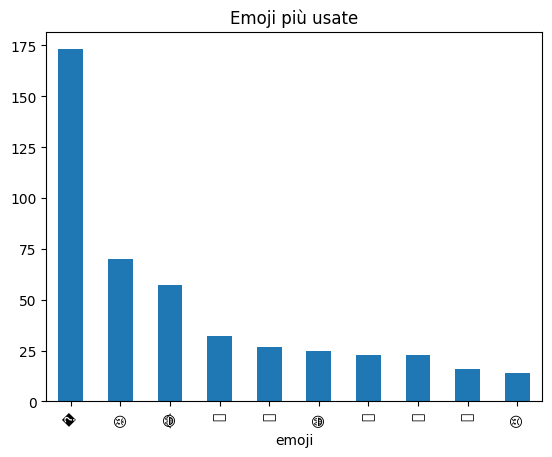

In [10]:
import matplotlib.pyplot as plt

# Istogramma delle emoji più usate
emoji_df.head(10).plot(kind='bar', x='emoji', y='count', legend=False, title='Emoji più usate')
plt.show()


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import numpy as np

# Preparazione dei dati
# Unisci tutte le emoji in una stringa per ogni tweet
df['emoji_string'] = df['emoji_list'].apply(lambda x: ' '.join(x))

# Usa CountVectorizer per creare una matrice delle emoji (bag-of-emojis)
vectorizer = CountVectorizer(analyzer='char', token_pattern=r'.')  # Analizza singoli caratteri (emoji)
emoji_matrix = vectorizer.fit_transform(df['emoji_string'])

# Applicazione di K-Means
num_clusters = 5  # Puoi cambiare il numero di cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(emoji_matrix)

# Aggiungiamo i cluster al DataFrame
df['cluster'] = clusters

# Analisi dei cluster
for cluster_num in range(num_clusters):
    print(f"Cluster {cluster_num}:")
    cluster_data = df[df['cluster'] == cluster_num]
    # Stampa alcune emoji frequenti nel cluster
    cluster_emoji_counts = cluster_data['emoji_list'].explode().value_counts()
    print(cluster_emoji_counts.head(10))
    print("-" * 50)


Cluster 0:
emoji_list
�    37
😡    27
🤔    20
😂    14
💩    11
😁    11
🤣     9
👎     9
🤮     8
🙄     8
Name: count, dtype: int64
--------------------------------------------------
Cluster 1:
emoji_list
😡    15
👿     6
👏     5
👍     4
Name: count, dtype: int64
--------------------------------------------------
Cluster 2:
emoji_list
�    54
Name: count, dtype: int64
--------------------------------------------------
Cluster 3:
emoji_list
😂    43
😡    28
👎    23
🤣    18
😁    14
💩    12
😭    10
🖕    10
🤦     8
😄     8
Name: count, dtype: int64
--------------------------------------------------
Cluster 4:
emoji_list
�    82
Name: count, dtype: int64
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:551: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn(


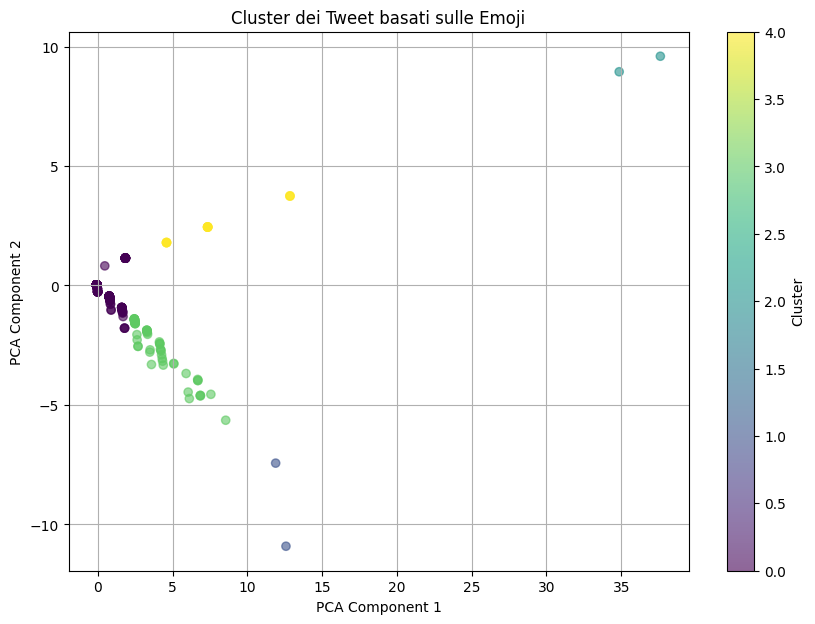

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Riduzione della dimensionalità con PCA
pca = PCA(n_components=2)
emoji_matrix_2d = pca.fit_transform(emoji_matrix.toarray())

# Creazione del grafico
plt.figure(figsize=(10, 7))
scatter = plt.scatter(emoji_matrix_2d[:, 0], emoji_matrix_2d[:, 1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title('Cluster dei Tweet basati sulle Emoji')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()


In [13]:
import plotly.express as px
from sklearn.decomposition import PCA

# Riduzione della dimensionalità con PCA
pca = PCA(n_components=2)
emoji_matrix_2d = pca.fit_transform(emoji_matrix.toarray())

# Creazione del DataFrame per il grafico
plot_df = pd.DataFrame({
    'PCA1': emoji_matrix_2d[:, 0],
    'PCA2': emoji_matrix_2d[:, 1],
    'Cluster': df['cluster']
})

# Grafico interattivo con Plotly
fig = px.scatter(
    plot_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    title='Cluster dei Tweet basati sulle Emoji',
    labels={'PCA1': 'PCA Component 1', 'PCA2': 'PCA Component 2'},
    hover_data=[df['text ']]  # Mostra il testo originale dei tweet quando si passa sopra un punto
)

fig.show()


In [14]:
from sklearn.manifold import TSNE

# Riduzione della dimensionalità con t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
emoji_matrix_2d_tsne = tsne.fit_transform(emoji_matrix.toarray())

# Creazione del DataFrame per il grafico
plot_df_tsne = pd.DataFrame({
    'tSNE1': emoji_matrix_2d_tsne[:, 0],
    'tSNE2': emoji_matrix_2d_tsne[:, 1],
    'Cluster': df['cluster']
})

# Grafico interattivo con Plotly
fig_tsne = px.scatter(
    plot_df_tsne,
    x='tSNE1',
    y='tSNE2',
    color='Cluster',
    title='Cluster dei Tweet basati sulle Emoji (t-SNE)',
    labels={'tSNE1': 't-SNE Component 1', 'tSNE2': 't-SNE Component 2'},
    hover_data=[df['text ']]  # Mostra il testo originale dei tweet
)

fig_tsne.show()


Sentiment Analysis combinata con le Emoji

In [15]:
from textblob import TextBlob

# Analisi del sentimento
df['sentiment'] = df['text '].apply(lambda x: TextBlob(x).sentiment.polarity)

# Media del sentimento per ogni emoji
emoji_sentiment = df.explode('emoji_list').groupby('emoji_list')['sentiment'].mean().sort_values()
print(emoji_sentiment)


emoji_list
🤐   -0.400000
😒   -0.133333
👋   -0.125000
🤬   -0.100000
😘   -0.062500
       ...   
☹    0.214286
🍸    0.214286
😲    0.400000
👹    0.416667
▪    0.500000
Name: sentiment, Length: 143, dtype: float64


Diamo un nome alle emoji

In [16]:
from emoji import demojize

def assign_emoji_names(emoji_list):
    return [demojize(e).strip(':') for e in emoji_list]

df['emoji_names'] = df['emoji_list'].apply(assign_emoji_names)


In [17]:
# Creazione di un DataFrame con emoji uniche e i loro nomi
unique_emojis = set([emoji for sublist in df['emoji_list'] for emoji in sublist])
emoji_name_mapping = {e: demojize(e).strip(':') for e in unique_emojis}

emoji_name_df = pd.DataFrame(list(emoji_name_mapping.items()), columns=['emoji', 'name'])
print(emoji_name_df)


    emoji                       name
0       ❗       red_exclamation_mark
1       ⚡               high_voltage
2       ↪   left_arrow_curving_right
3       😤  face_with_steam_from_nose
4       ♂                  male_sign
..    ...                        ...
138     ♀                female_sign
139     🤪                  zany_face
140     🌈                    rainbow
141     😢                crying_face
142     😣           persevering_face

[143 rows x 2 columns]


Conteggio delle occorrenze dei nomi delle emoji

In [18]:
from collections import Counter

# Unisci tutte le liste di nomi di emoji in una lista unica
all_emoji_names = [name for names in df['emoji_names'] for name in names]

# Conta la frequenza dei nomi delle emoji
emoji_name_counts = Counter(all_emoji_names)

# Converte i risultati in un DataFrame per analisi e visualizzazione
emoji_name_df = pd.DataFrame(emoji_name_counts.items(), columns=['emoji_name', 'count']).sort_values(by='count', ascending=False)

print(emoji_name_df.head())


                       emoji_name  count
2                               �    173
15                   enraged_face     70
8          face_with_tears_of_joy     57
29                    thumbs_down     32
62  rolling_on_the_floor_laughing     27


Sostituzione delle emoji con i nomi

In [19]:
from emoji import demojize

def replace_emojis(text):
    # Converti le emoji nei loro nomi senza i due punti
    return demojize(text, delimiters=(" ", ""))

# Applica la funzione alla colonna 'text '
df['text_with_emoji_names'] = df['text '].apply(replace_emojis)




In [20]:
df

,id,text,emoji_list,emotions,emoji_string,cluster,sentiment,emoji_names,text_with_emoji_names
0,2066,"È terrorismo anche questo, per mettere in uno ...",[],[],,0,0.0,[],"È terrorismo anche questo, per mettere in uno ..."
1,2045,@user @user infatti finché ci hanno guadagnato...,[],[],,0,0.5,[],@user @user infatti finché ci hanno guadagnato...
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",[],[],,0,0.0,[],"Corriere: Tangenti, Mafia Capitale dimenticata..."
3,1259,"@user ad uno ad uno, perché quando i migranti ...",[],[],,0,0.0,[],"@user ad uno ad uno, perché quando i migranti ..."
4,949,Il divertimento del giorno? Trovare i patrioti...,[],[],,0,0.0,[],Il divertimento del giorno? Trovare i patrioti...
...,...,...,...,...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,[],[],,0,0.0,[],Gli stati nazionali devono essere pronti a rin...
6833,9121,Il ministro dell'interno della Germania #Horst...,[],[],,0,0.0,[],Il ministro dell'interno della Germania #Horst...
6834,8549,#Salvini: In Italia troppi si sono montati la ...,[],[],,0,0.0,[],#Salvini: In Italia troppi si sono montati la ...
6835,9240,@user @user Chi giubila in buona fede non ha c...,[],[],,0,0.0,[],@user @user Chi giubila in buona fede non ha c...


In [21]:
df['emotions'].value_counts()

,count
emotions,
[],6778
[gioia],16
[rabbia],15
"[rabbia, rabbia, rabbia]",5
"[rabbia, rabbia, rabbia, rabbia]",4
"[gioia, gioia, gioia, gioia, gioia]",3
[tristezza],3
"[gioia, gioia, gioia]",3
"[gioia, gioia, gioia, gioia]",3


Rendiamo i nomi delle emoji più leggibili

In [22]:
def replace_emojis_readable(text):
    text = demojize(text, delimiters=(" ", ""))
    # Sostituisci gli underscore con spazi e capitalizza ogni parola
    words = text.split()
    new_words = []
    for word in words:
        if '_' in word:
            word = word.replace('_', ' ').title()
        new_words.append(word)
    return ' '.join(new_words)

df['text_with_emoji_names'] = df['text '].apply(replace_emojis_readable)



In [24]:
df

,id,text,emoji_list,emotions,emoji_string,cluster,sentiment,emoji_names,text_with_emoji_names
0,2066,"È terrorismo anche questo, per mettere in uno ...",[],[],,0,0.0,[],"È terrorismo anche questo, per mettere in uno ..."
1,2045,@user @user infatti finché ci hanno guadagnato...,[],[],,0,0.5,[],@user @user infatti finché ci hanno guadagnato...
2,61,"Corriere: Tangenti, Mafia Capitale dimenticata...",[],[],,0,0.0,[],"Corriere: Tangenti, Mafia Capitale dimenticata..."
3,1259,"@user ad uno ad uno, perché quando i migranti ...",[],[],,0,0.0,[],"@user ad uno ad uno, perché quando i migranti ..."
4,949,Il divertimento del giorno? Trovare i patrioti...,[],[],,0,0.0,[],Il divertimento del giorno? Trovare i patrioti...
...,...,...,...,...,...,...,...,...,...
6832,9340,Gli stati nazionali devono essere pronti a rin...,[],[],,0,0.0,[],Gli stati nazionali devono essere pronti a rin...
6833,9121,Il ministro dell'interno della Germania #Horst...,[],[],,0,0.0,[],Il ministro dell'interno della Germania #Horst...
6834,8549,#Salvini: In Italia troppi si sono montati la ...,[],[],,0,0.0,[],#Salvini: In Italia troppi si sono montati la ...
6835,9240,@user @user Chi giubila in buona fede non ha c...,[],[],,0,0.0,[],@user @user Chi giubila in buona fede non ha c...
